# ByteTrack 논문 리뷰

## MOT의 문제점
MOT는 영상 속 객체의 bounding box와 ID를 추적한다. 이 방식은 confidence가 높은 객체만 추적하기 때문에 일시적으로 가려진 객체는 confidence가 낮아져 추적에서 제외되고 ID가 끊기는 문제점이 발생한다. 이처럼 낮은 confidence를 버리면 실제 객체도 함께 같이 사라지는 문제가 발생한다.

## ByteTrack이란?
**낮은 confidence 객체도 살려서 ID를 유지하며 tracking하는 방식**
- **low score detection 활용**
  - high score detection뿐 아니라 low score detection도 사용
  -  low score detection에 대해 tracklet과 similarity를 계산하여 진짜 객체인지 판별하고 맞으면 tracking에 포함
- **성능 향상**
  - ByteTrack 방식을 최신 트래커에 적용 시 IDF1 점수가 일관되게 상승
- **YOLOX 기반**
  - 높은 성능의 객체 검출기인 YOLOX를 기반으로 개발
 
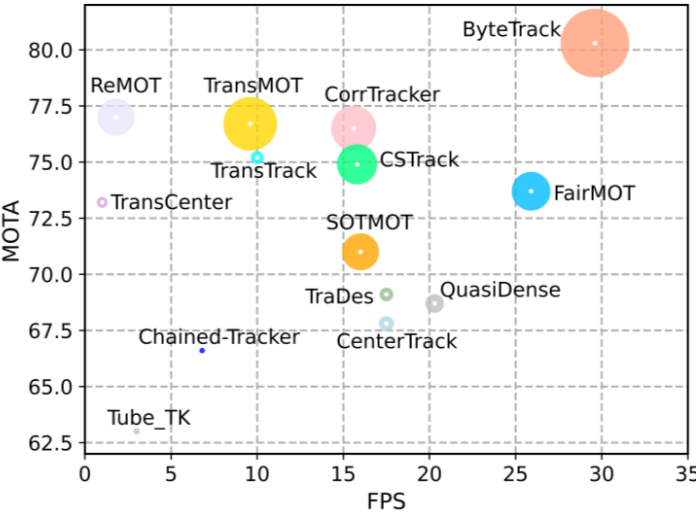

## MOT vs ByteTrack
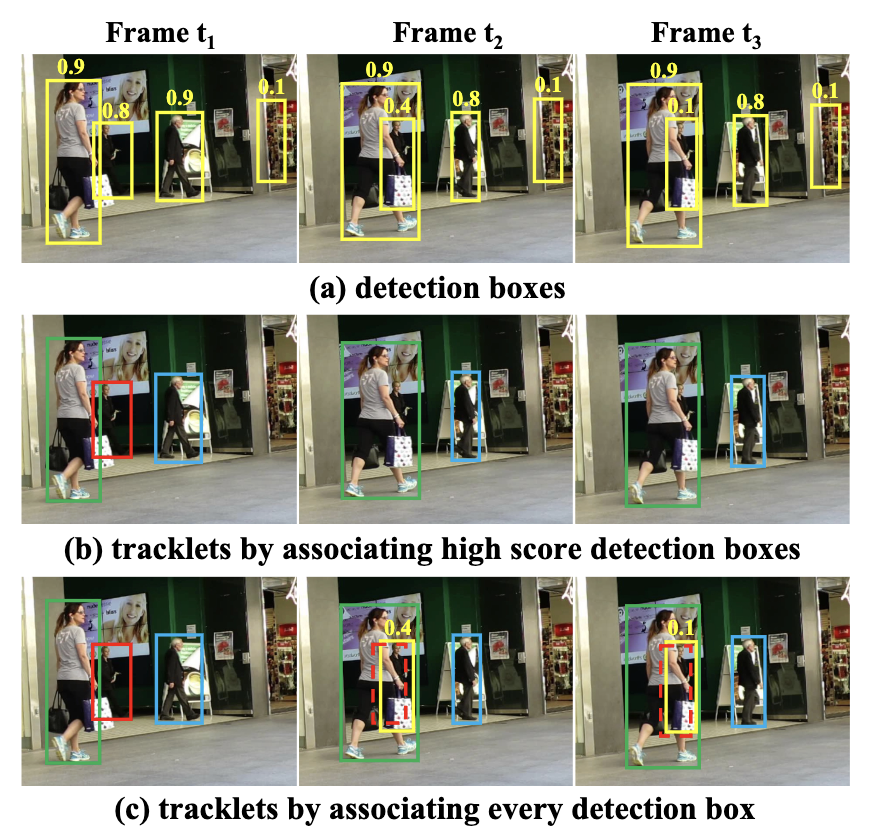

#### (a) Detection boxes
- bounding box 위 숫자 = detection confidence(0~1)
- t1: 모두 높은 점수 -> 추적 시작
- t2~t3: 한 사람(red tracklet)의 점수가 0.4, 0.1로 낮아짐 → occlusion 영향
- 일반적인 MOT는 threshold(예: 0.5) 미만이면 버림

#### (b) MOT 방식(high score detection만 사용)
- 0.5 미만 detection을 버림 -> 빨간 tracklet이 중간에 사라짐
- 결과: ID 끊김 + 궤적 손실

#### (c) ByteTrack(모든 detection 사용)
- 1차 매칭: High score detection ↔ 기존 tracklet 매칭 <br>
(모션 유사도 / 외형 유사도 활용)
- 2차 매칭: 남은 tracklet ↔ Low score detection 매칭 <br>
(칼만 필터로 예측한 위치와 IoU 비교)
- 낮은 점수라도 tracklet과 위치가 잘 맞으면 연결 유지 <br>
→ 빨간 tracklet이 끝까지 추적됨
- 배경 박스(오른쪽 끝)는 매칭 안 되어 제거됨